In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Parametros
eps_0 = 8.85*(10**(-12))
eps_r = 10
q_arg210 = 1     #10**(-19)
q_asp61 = -1
lam_1 = 1.1*(10**(-9)) #1/lambda
k_0 = 1/(4*np.pi*eps_0)

R = 5*(10**(-9)) #Radio del rotor
z = 0.52*(10**(-9)) #posición Arg210 fuera del plano del rotor
R_2 = R + z

Potencial de Coulomb apantallado

$U=\frac{1}{4\pi\epsilon_{0} \epsilon_{r}}\frac{q_{Arg210} \cdot q_{Asp61}}{r} e^{-r/\lambda}$

In [3]:
#Funciones
def U_Coulomb(q_arg210,q_asp61,r):
    u = k_0*(1/eps_r)*((q_arg210*q_asp61)/r)*np.exp(-r/lam_1)
    return u

In [13]:
#definiendo r en función de theta
t = np.linspace(0, (2*np.pi)/12, 100)
t1 = t
t2 = (2*np.pi)/12 + t
#t2 = np.linspace((2*np.pi)/12, 2*(2*np.pi)/12, 100)
r1_R = np.sqrt(R_2**2 + R**2 - 2*R*R_2*np.cos(t1)) #posición Asp61 de la derecha
r2_L = np.sqrt(R_2**2 + R**2 - 2*R*R_2*np.cos(t2)) #posición Asp61 de la izquierda



In [5]:
#Estados protonado y desprotonado
u_R_des = U_Coulomb(q_arg210,q_asp61,r1_R)
u_R_prot = U_Coulomb(q_arg210,0,r1_R)

u_L_des = U_Coulomb(q_arg210,q_asp61,r2_L)
u_L_prot = U_Coulomb(q_arg210,0,r2_L)


Potencial estado $E=(o,o)$

In [6]:
#Empty
U_Empty = u_R_des + u_L_des

Potencial estado $R=(o,\cdot)$

In [7]:
#Right
U_Right = u_R_prot + u_L_des

Potencial estado $F=(\cdot,\cdot)$

In [8]:
#Full
U_Full = u_R_prot + u_L_prot

Potencial estado $L=(\cdot,o)$

In [9]:
#Left
U_Left = u_R_des + u_L_prot

Gráficas

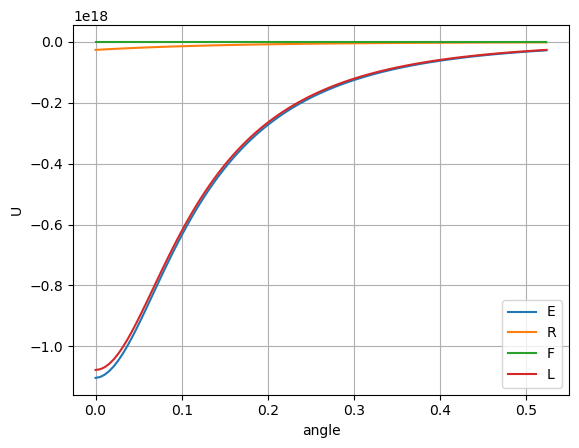

In [10]:
plt.plot(t,U_Empty, label="E")
plt.plot(t,U_Right, label="R")
plt.plot(t,U_Full, label="F")
plt.plot(t,U_Left, label="L")
plt.xlabel("angle")
#plt.ylim(-1.15*10**18,-0.6*10**18)
plt.ylabel("U")
plt.grid()
plt.legend()
plt.show()


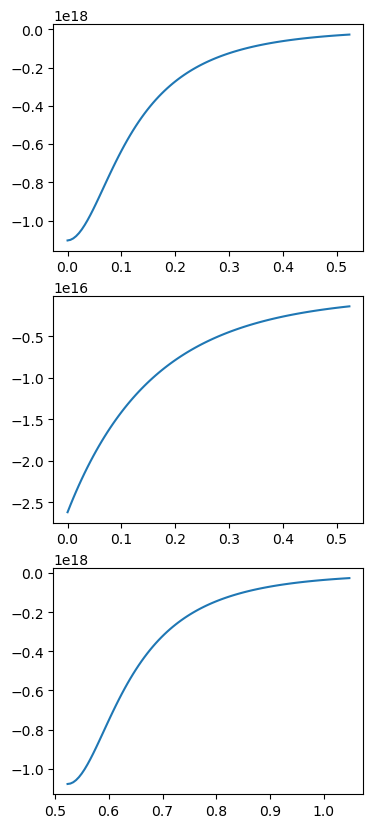

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(4,10))
ax[0].plot(t,U_Empty)
ax[1].plot(t1,U_Right)
ax[2].plot(t2,U_Left)
#ax[1,1].plot(t2,U_Right_L)
#ax[2,0].plot(t,U_Left)
#ax[2,1].plot(t2,U_Left_L)